**The Sparks FOundation- Data Science and Business Analytics Internship (GRIP APRIL 2022)**

**Level: Beginner**

**Task 1: Prediction using Supervised ML (Simple Linear Regression task)**

**Problem Statement: Predict the percentage of a student based on the number of Study Hours.**

**To find: What will be the predicted Score of a student if he studies for 9.25 hours a day?**

**Name: Rewa Hrishikesh Aslekar**

In [22]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**Import data from the given link**

In [4]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(25) # taking 10 data points

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Describe the data**

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
data.shape

(25, 2)

**Validating the data for NULL values**

In [6]:
# Checking for any null value in the Dataset
data.isnull == True

False

**Visualize the data using Scatter Plot**

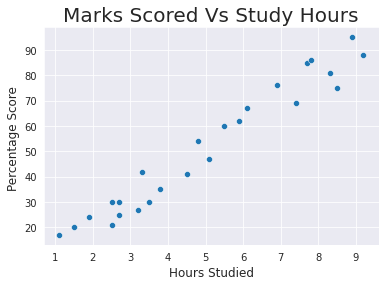

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Scored Vs Study Hours',size=20)
plt.ylabel('Percentage Score ', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

As we can see, there is a positive linear relation between the number of hours studied and the percentage of score. That means, higher the no. of hours studied, higher the score.

**Plotting a Regression line to confirm the corelation between the "Marks Percentage" and "Hours Studied"**

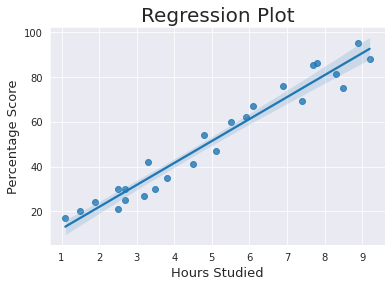

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage Score', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()
print(data.corr())

**Data preprocessing and modelling**

In [29]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in twotraining set and data set
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

**Fitting and Training the Data**

In [27]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model has been trained Successfully.")


Model has been trained Successfully.


In [30]:
print('Test Score')
print(regression.score(test_X, test_y))
print('Training Score')
print(regression.score(train_X, train_y))

Test Score
0.9367661043365056
Training Score
0.9484509249326872


In [35]:
test_y

array([20, 27, 69, 30, 62, 35, 24])

In [40]:
predict_y

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

**Data Prediction**

In [31]:
predict_y = regression.predict(test_X)
predictMark = pd.DataFrame({'Hours': [i[0] for i in test_X], 
                           'Predicted Marks': [k for k in predict_y]})
predictMark

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Predicted value VS Actual Value**

In [32]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


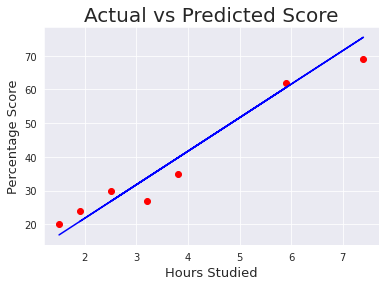

In [34]:
#Data Comparison using data visualization
plt.scatter(x=test_X, y=test_y, color='red')
plt.plot(test_X, predict_y, color='Blue')
plt.title('Actual vs Predicted Score', size=20)
plt.ylabel('Percentage Score', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

**Evaluating Data Model**

In [39]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,predict_y))
print('Mean squared error: ',mean_squared_error(test_y,predict_y))

Mean absolute error:  4.130879918502482
Mean squared error:  20.33292367497996


**Predicted score of a student who studies for 9.25 hrs/day**

In [38]:
hours = [9.25]
answer = regression.predict([hours])
print("Score of a student who has studied for 9.25 hours a day is:= {}".format(round(answer[0],3)))

Score of a student who has studied for 9.25 hours a day is:= 93.893
